# Download study area, road network
Study area: Convert the GeoJSON file retrieved from http://polygons.openstreetmap.fr with OSM Relation ID = 3464353 to a shapefile.

In [13]:
from src import data_retrieve_functions as drf
import geopandas as gpd
import os
from pathlib import Path
import contextily as ctx
import matplotlib.pyplot as plt
# To make it pretty
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.style.use('seaborn-colorblind')
font = {'size': 16}
mpl.rc('font', **font)

def add_basemap(ax, zoom=15, url='http://tile.stamen.com/toner/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

epsg_code = 3857 # UTM 50N where Shenzhen is located = 32650; 3857 for basemap adding
data_path = os.path.join(Path(os.getcwd()).parent.parent, 'data/')
figure_path = os.path.join(Path(os.getcwd()).parent.parent, 'figures/')

## 0 Create hexagonal cells in QGIS

## 1 Download the drive road network by the study area's polygon

In [2]:
gdf_sz = gpd.GeoDataFrame.from_file(os.path.join(data_path, 'geo/shenzhen.shp'))
drf.osm_net_retrieve_polygon(gdf_sz.geometry.item(), 'drive', osm_folder=os.path.join(data_path, 'geo/'))

## 2 Visualise the study area

In [14]:
## Load data
# Hexagonal cells
gdf_grids = gpd.GeoDataFrame.from_file(os.path.join(data_path, 'geo/grids.shp')).to_crs(epsg_code)

# Study area's boundary
gdf_sz = gdf_sz.to_crs(epsg_code)

# Drive road network as reference in the background
gdf_road = gpd.GeoDataFrame.from_file(os.path.join(data_path, 'geo/drive_net.shp')).to_crs(epsg_code)

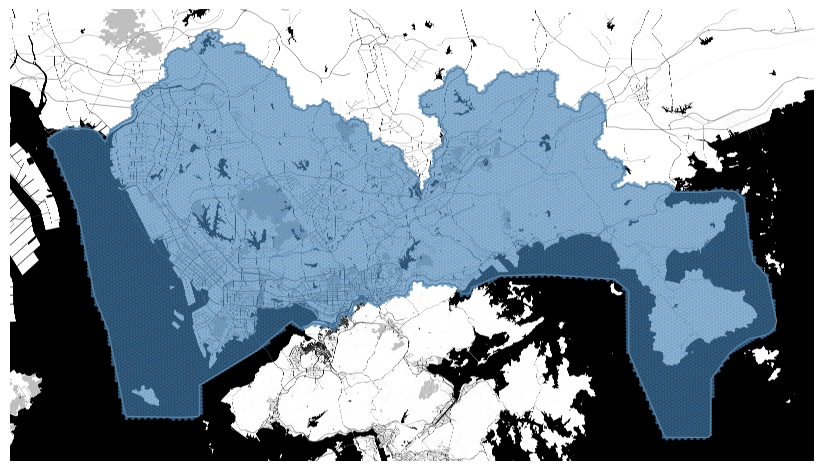

In [15]:
## Plot on a map
f, ax = plt.subplots(1,1, figsize=(10, 5))
gdf_sz.plot(ax=ax, edgecolor='gray', facecolor='none', legend=False, zorder=1) # Normalize
gdf_grids.plot(ax=ax, edgecolor='none', facecolor='steelblue', alpha=0.7, legend=False, zorder=2) # Normalize
add_basemap(ax)
ax.set_axis_off()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path, "study_area.png"), dpi=300)
plt.show()
